### 一元一次正规方程

一元一次方程真实的斜率和截距是： [1] [9]
通过正规方程求解的斜率和截距是： [[1.  ]
 [8.91]]
(30, 2) (2, 1)


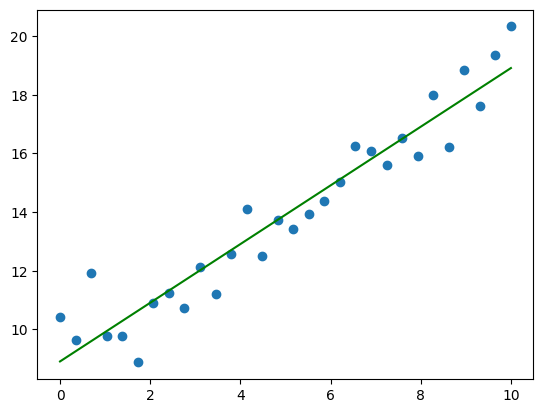

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 转化成矩阵
X = np.linspace(0, 10, num=30).reshape(-1, 1)
# 斜率和截距，随机生成
w = np.random.randint(1, 5, size=1)
b = np.random.randint(1, 10, size=1)
# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = X * w + b + np.random.randn(30, 1)
plt.scatter(X, y)
# 重新构造X，b截距，相当于系数w0，前面统一乘以1
X = np.concatenate([X, np.full(shape=(30, 1), fill_value=1)], axis=1)
# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

print('一元一次方程真实的斜率和截距是：', w, b)
print('通过正规方程求解的斜率和截距是：', θ)
# 根据求解的斜率和截距绘制线性回归线型图
print(X.shape, θ.shape)
plt.plot(X[:, 0], X.dot(θ), color='green')
# plt.savefig('./19-简单线性回归.jpg',dpi =200)

### 多元一次正规方程

二元一次方程真实的斜率和截距是： [4 2 6]
通过正规方程求解的斜率和截距是： [4.  2.  6.2]


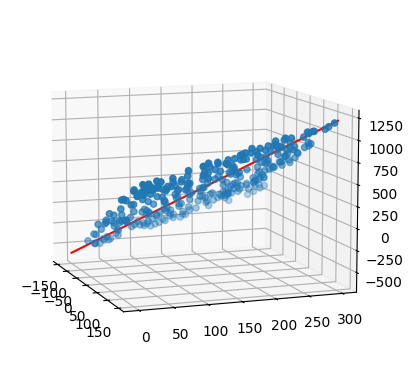

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 斜率和截距，随机生成
w = np.random.randint(1, 5, size=2)
b = np.random.randint(1, 10, size=1)

# 转化成矩阵
x1 = np.random.randint(-150, 150, size=(300, 1))
x2 = np.random.randint(0, 300, size=(300, 1))

# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300, 1)
ax = plt.subplot(111, projection='3d')
ax.scatter(x1, x2, y)  # 三维散点图
ax.view_init(elev=10, azim=-20)  # 调整视角
# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1, x2, np.full(shape=(300, 1), fill_value=1)], axis=1)
w = np.concatenate([w, b])
# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)
print('二元一次方程真实的斜率和截距是：', w)
print('通过正规方程求解的斜率和截距是：', θ.reshape(-1))
# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150, 150, 100)
y = np.linspace(0, 300, 100)
z = x * θ[0] + y * θ[1] + θ[2]
ax.plot(x, y, z, color='red')


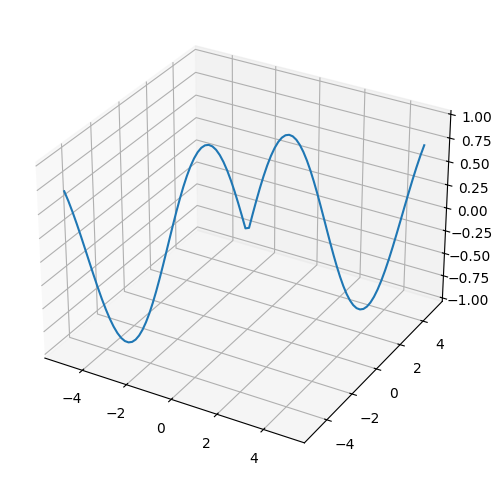

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 创建数据
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.sin(np.sqrt(x ** 2 + y ** 2))

# 创建图形
fig = plt.figure(figsize=(9, 6))  # 创建一个图形对象
ax = fig.add_subplot(111, projection='3d')  # 创建3D坐标轴

# 绘制3D曲线
ax.plot(x, y, z)

# 显示图形
plt.show()


### 一元一次sklearn方法

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 转化成矩阵
X = np.linspace(0, 10, num=30).reshape(-1, 1)
# 斜率和截距，随机生成
w = np.random.randint(1, 5, size=1)
b = np.random.randint(1, 10, size=1)
# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = X * w + b + np.random.randn(30, 1)
plt.scatter(X, y)
# 使用scikit-learn中的线性回归求解
model = LinearRegression()
model.fit(X, y)
w_ = model.coef_
b_ = model.intercept_
print('一元一次方程真实的斜率和截距是：', w, b)
print('通过scikit-learn求解的斜率和截距是：', w_, b_)
plt.plot(X, X.dot(w_) + b_, color='green')

### 多元一次sklearn方法

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 转化成矩阵
x1 = np.random.randint(-150, 150, size=(300, 1))
x2 = np.random.randint(0, 300, size=(300, 1))
# 斜率和截距，随机生成
w = np.random.randint(1, 5, size=2)
b = np.random.randint(1, 10, size=1)
# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300, 1)
fig = plt.figure(figsize=(9, 6))
ax = Axes3D(fig)
ax.scatter(x1, x2, y)  # 三维散点图
ax.view_init(elev=10, azim=-20)  # 调整视角
# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1, x2], axis=1)
# 使用scikit-learn中的线性回归求解
model = LinearRegression()
model.fit(X, y)
w_ = model.coef_.reshape(-1)
b_ = model.intercept_
print('二元一次方程真实的斜率和截距是：', w, b)
print('通过scikit-learn求解的斜率和截距是：', w_, b_)
# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150, 150, 100)
y = np.linspace(0, 300, 100)
z = x * w_[0] + y * w_[1] + b_
ax.plot(x, y, z, color='green')
plt.savefig('./23-scikit-learn多元线性回归.jpg', dpi=200)